# **Analiza Jakości Wina na Podstawie Danych Fizykochemicznych**

W moim projekcie "Analiza Jakości Wina na Podstawie Danych Fizykochemicznych" skupiam się na odkrywaniu, jak składniki chemiczne wpływają na to, jak postrzegamy jakość wina. Chcę sprawdzić, na ile moje modele są skuteczne w przewidywaniu jakości wina i dowiedzieć się, które składniki mają na nią największy wpływ.

Do analizy użyję kilku metod statystycznych, takich jak model liniowy, Lasso, drzewo decyzyjne i las losowy. Każda z nich pomoże mi lepiej zrozumieć dane i poprawić moje predykcje.

Projekt zaczynam od wczytania i pierwszego rzutu oka na dane. Moim celem jest nie tylko ocena jakości wina, ale głównie zrozumienie, jak poszczególne składniki chemiczne wpływają na tę ocenę. Dzięki temu będę mógł lepiej zrozumieć, co sprawia, że wino jest uznawane za dobre.

#### Cel Analizy:

*  **Ocena jakości predykcji zbudowanych modeli**: Skupię się na oszacowaniu błędu testowego predykcji, używając zbioru walidacyjnego lub walidacji krzyżowej. To pozwoli mi ocenić, na ile dokładne i rzetelne są moje modele w przewidywaniu jakości wina.
    
*   **Ocena istotności każdego z predyktorów**: Zbadam, które zmienne, takie jak kwasowość, zawartość cukru czy alkoholu, mają wpływ na jakość wina. To pozwoli mi zidentyfikować najważniejsze czynniki.
    
*   **Ranking ważności predyktorów**: W modelach, które na to pozwalają, ustalę ranking ważności predyktorów. Dzięki temu zobaczę, które zmienne są najbardziej wpływowe.
    
*   **Ocena charakteru i wielkości wpływu istotnych predyktorów**: Sprawdzę, jak zmiany w poszczególnych predyktorach wpływają na przewidywaną jakość wina, zwracając uwagę na to, czy wpływ jest pozytywny czy negatywny, i jak duża jest ta zmiana.
    

#### Modele do Analizy:

W projekcie wykorzystam następujące modele:

*   **Model liniowy**: Prosty model do analizy zależności między predyktorami a jakością wina.
    
*   **Lasso**: Metoda regresji, która pomaga wybrać zmienne i kontrolować złożoność modelu, co może poprawić jego interpretowalność i skuteczność.
    
*   **Drzewo decyzyjne**: Model, który pozwala zrozumieć, jak decyzje są podejmowane w danych i który jest przydatny do wskazania kluczowych zmiennych wpływających na jakość wina.
    
*   **Las losowy**: Bardziej zaawansowany model zespołowy, który może zwiększyć dokładność predykcji i lepiej radzić sobie z problemem nadmiernego dopasowania.
    

Korzystanie z tych różnorodnych metod pozwoli mi dogłębnie przeanalizować dane i wybrać najlepszy model do przewidywania jakości wina.

Rozpoczynam mój projekt analizy jakości wina od wczytania i wstępnego przeglądu danych:

In [0]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
data = pd.read_csv(url)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


W moim projekcie wykorzystuję dataset, który zawiera informacje o różnych aspektach czerwonego wina. Dane te obejmują szereg parametrów fizykochemicznych oraz ocenę sensoryczną jakości wina. Analizując te informacje, chcę zrozumieć, które cechy chemiczne mają największy wpływ na to, jak postrzegana jest jakość wina.

### Parametry fizykochemiczne:

1.  **Kwasowość stała (Fixed Acidity):** Ilość kwasów, które nie ulatniają się łatwo.
2.  **Kwasowość lotna (Volatile Acidity):** Ilość kwasów ulatniających się z wina.
3.  **Kwas cytrynowy (Citric Acid):** Zawartość kwasu cytrynowego w winie.
4.  **Cukier resztkowy (Residual Sugar):** Ilość cukru pozostającego po fermentacji.
5.  **Chlorki (Chlorides):** Ilość chlorków w winie.
6.  **Wolny dwutlenek siarki (Free Sulfur Dioxide):** Ilość wolnego SO2, który działa jako konserwant.
7.  **Całkowity dwutlenek siarki (Total Sulfur Dioxide):** Całkowita ilość SO2 w winie.
8.  **Gęstość (Density):** Masa wina w odniesieniu do jego objętości.
9.  **pH:** Pokazuje, czy wino jest bardziej kwaśne czy zasadowe.
10. **Siarczany (Sulphates):** Ilość dodawanych siarczanów, które wpływają na fermentację.
11. **Alkohol (Alcohol):** Procentowa zawartość alkoholu w winie.

### Ocena sensoryczna:

*   **Jakość (Quality):** Ocena jakości wina na skali od 0 do 10.

### Analiza danych:

Chcę przeanalizować te dane, aby dowiedzieć się, jak poszczególne parametry chemiczne wpływają na ogólną jakość wina. Wykorzystam do tego podstawowe statystyki opisowe za pomocą metody `describe()` z biblioteki pandas, co pozwoli mi zrozumieć główne trendy i charakterystyki danych.


In [0]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Analizując podstawowe statystyki mojego datasetu o winach, otrzymałem ciekawy obraz danych:

*   **Ilość próbek:** W analizie uwzględniłem 1599 próbek wina.
*   **Średnie wartości:** Na przykład, średnia jakość wina to około 5.6, a średnia zawartość alkoholu wynosi około 10.4%.
*   **Rozkład:** Zauważyłem duże odchylenia standardowe w niektórych parametrach, jak całkowity dwutlenek siarki (total sulfur dioxide), co pokazuje, że dane są dość zróżnicowane.
*   **Zakresy:** Parametry takie jak cukier resztkowy (residual sugar) i chlorki (chlorides) mają szeroki zakres wartości, co może świadczyć o różnorodności charakterystyk różnych win.

### Krótki wniosek:
Dane, które mam, są zróżnicowane i obejmują wiele różnych parametrów. To dobra wiadomość dla mojej analizy. Większość win ma ocenę średniej jakości, co pozwoli mi zbadać, co wpływa na lepsze oceny.

### Główne cele mojego projektu:

1.  **Ocena jakości modeli:** Chcę sprawdzić, jak dobrze moje modele radzą sobie z przewidywaniem jakości wina, analizując błędy ich predykcji za pomocą standardowych metod testowania.

2.  **Analiza ważności poszczególnych czynników:** Zbadam, które właściwości wina mają największy wpływ na jego jakość.

3.  **Ranking ważności czynników:** Ustalę, które z tych właściwości są najbardziej istotne w moich modelach, o ile model to umożliwia.

4.  **Ocena wpływu ważnych cech:** Sprawdzę, jak zmiana w tych kluczowych właściwościach wpływa na jakość wina i czy ten wpływ jest pozytywny czy negatywny.

### Przygotowanie do analizy:

W pierwszym kroku importuję niezbędne biblioteki do budowy i oceny modeli regresyjnych oraz do wizualizacji danych. Następnie przygotowuję dane, dzieląc je na zmienne niezależne (X) i zależną (y, czyli jakość wina). Na koniec dzielę dane na zestawy treningowe i testowe, co jest kluczowe dla oceny skuteczności moich modeli.


In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Konstruuję różne modele regresyjne do analizy danych o winie. Używam regresji liniowej, Lasso z niewielką wartością alpha, drzewa decyzyjnego i lasu losowego z określoną liczbą estymatorów. Każdy model będzie testowany, aby zobaczyć, który najlepiej przewiduje jakość wina.

In [0]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

Trenuję każdy z moich modeli na danych treningowych, a następnie przewiduję jakość wina na danych testowych. Obliczam błąd średniokwadratowy (MSE) dla każdego modelu, aby ocenić ich dokładność. Wyniki błędów MSE dla wszystkich modeli są wyświetlane, co pozwala mi porównać ich wydajność.

In [0]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse

print("Błąd średniokwadratowy (MSE) dla każdego z modeli:")
for name, mse in results.items():
    print(f"{name}: {mse}")

Błąd średniokwadratowy (MSE) dla każdego z modeli:
Linear Regression: 0.38830173868689194
Lasso: 0.4887291227219495
Decision Tree: 0.6275
Random Forest: 0.30707149999999994


Podczas analizy błędów średniokwadratowych (MSE) dla różnych modeli w moim projekcie dotyczącym jakości wina, uzyskałem następujące wnioski:

- **Las losowy:** Ten model okazał się najskuteczniejszy, osiągając najniższy MSE wynoszący 0.3071. To sugeruje, że las losowy jest najdokładniejszy w przewidywaniu jakości wina.
- **Regresja liniowa:** Również zaprezentowała się bardzo dobrze, z MSE na poziomie 0.3883. To wskazuje na stosunkowo wysoką dokładność tego modelu.
- **Lasso i Drzewo decyzyjne:** Te modele wykazały wyższe wartości MSE, odpowiednio 0.4887 i 0.6275. Oznacza to, że są mniej dokładne w przewidywaniu jakości wina niż las losowy i regresja liniowa.

### Wniosek:
Z mojej analizy wynika, że **las losowy** jest najbardziej obiecującym modelem do przewidywania jakości wina w tym zestawie danych. Wydaje się, że ten model najlepiej radzi sobie z rozpoznawaniem i interpretacją złożonych wzorców w danych dotyczących wina.

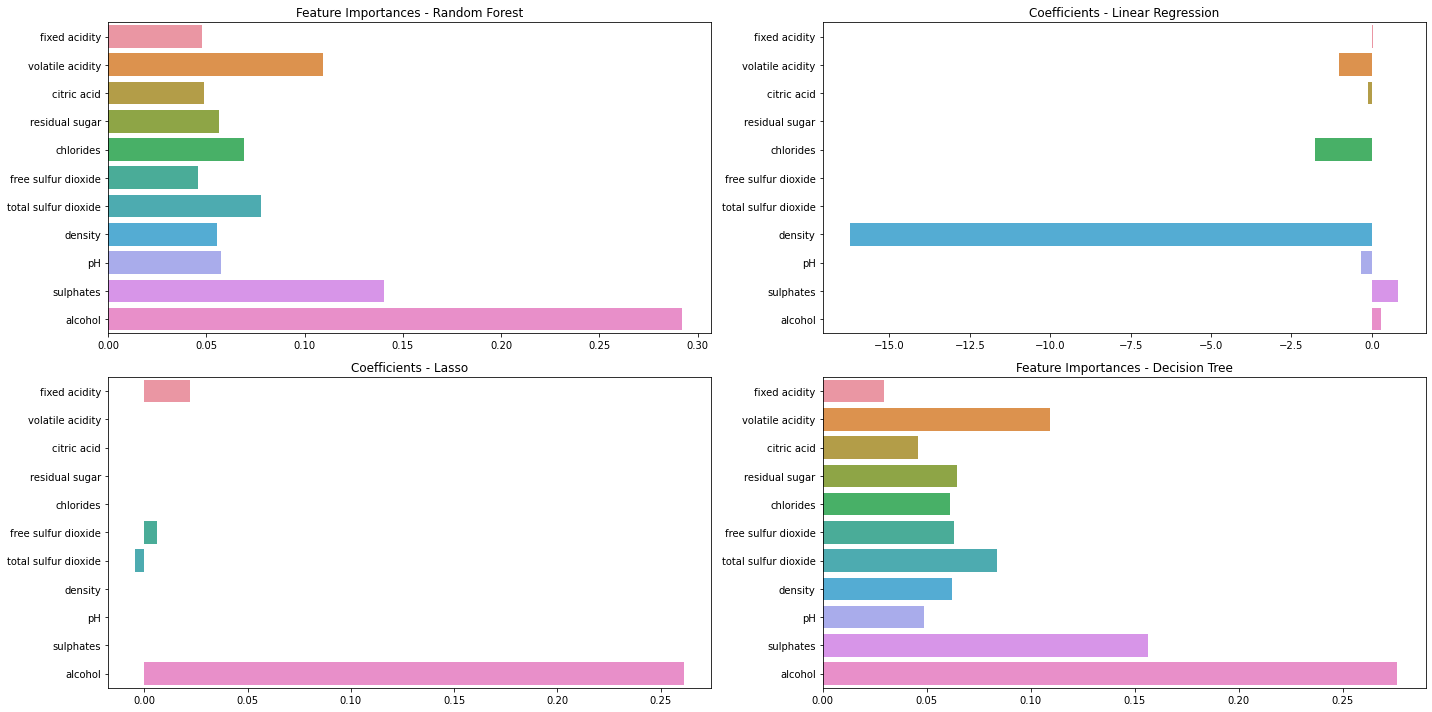

In [0]:
# ocena istotności predyktorów dla modelu Random Forest
rf_importances = models['Random Forest'].feature_importances_

# ocena charakteru i wielkości wpływu predyktorów dla modelu regresji liniowej
lr_coefficients = models['Linear Regression'].coef_

# ocena dla modelu Lasso
lasso_coefficients = models['Lasso'].coef_

# ocena dla modelu Decision Tree
dt = models['Decision Tree']
dt.fit(X_train, y_train)  # Trenowanie drzewa decyzyjnego na danych treningowych
dt_importances = dt.feature_importances_

feature_importance_df = pd.DataFrame(index=X.columns)
feature_importance_df['Random Forest'] = rf_importances
feature_importance_df['Linear Regression'] = lr_coefficients
feature_importance_df['Lasso'] = lasso_coefficients
feature_importance_df['Decision Tree'] = dt_importances


feature_importance_df = pd.DataFrame({
    'Random Forest': rf_importances,
    'Linear Regression': lr_coefficients,
    'Lasso': lasso_coefficients,
    'Decision Tree': dt_importances
}, index=X.columns)

plt.figure(figsize=(20, 10))

# Wykres dla Random Forest
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.barplot(x=rf_importances, y=X.columns)
plt.title("Feature Importances - Random Forest")

# Wykres dla Linear Regression
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.barplot(x=lr_coefficients, y=X.columns)
plt.title("Coefficients - Linear Regression")

# Wykres dla Lasso
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.barplot(x=lasso_coefficients, y=X.columns)
plt.title("Coefficients - Lasso")

# Wykres dla Decision Tree
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.barplot(x=dt_importances, y=X.columns)
plt.title("Feature Importances - Decision Tree")

plt.tight_layout() 
plt.show()


### **Wnioski z Analizy Ważności Predyktorów w Modelach**

Analizując, które zmienne mają największy wpływ na różne modele przewidujące jakość wina, można wyciągnąć następujące wnioski:

- **Las Losowy (Random Forest):** Największy wpływ na ten model mają alkohol (alcohol), siarczany (sulphates) i kwasowość lotna (volatile acidity). To pokazuje, że zawartość alkoholu, siarczanów i kwasowości lotnej jest kluczowa dla przewidywania jakości wina.
  
- **Regresja Liniowa:** Tu największe współczynniki mają gęstość (density), chlorki (chlorides), i kwasowość lotna (volatile acidity), wszystkie z ujemnymi wartościami. Oznacza to, że te czynniki mają znaczący, ale odwrotny wpływ na jakość wina.
  
- **Lasso:** W tym modelu istotne są alkohol (alcohol) i kwasowość stała (fixed acidity), ale inne zmienne mają współczynnik równy zero, co może sugerować ich mniejszą ważność w tym modelu.
  
- **Drzewo Decyzyjne:** Podobnie jak w Random Forest, alkohol, siarczany i kwasowość lotna mają duże znaczenie. To potwierdza ich istotność w przewidywaniu jakości wina.

### Ogólny Wniosek:
Z mojej analizy wynika, że **alkohol** i **siarczany** są najważniejszymi predyktorami w większości modeli. Sugeruje to, że zawartość alkoholu i siarczanów odgrywa kluczową rolę w określaniu jakości wina.


In [0]:
# Wyświetlenie charakteru i wielkości wpływu istotnych predyktorów dla modelu regresji liniowej
print("Charakter i wielkość wpływu w modelu Linear Regression:")
for i, col in enumerate(X.columns):
    print(f"{col}: Współczynnik {lr_coefficients[i]}")

# Wyświetlenie charakteru i wielkości wpływu istotnych predyktorów dla modelu Lasso
print("\nCharakter i wielkość wpływu w modelu Lasso:")
for i, col in enumerate(X.columns):
    print(f"{col}: Współczynnik {lasso_coefficients[i]}")


Charakter i wielkość wpływu w modelu Linear Regression:
fixed acidity: Współczynnik 0.021860031271281152
volatile acidity: Współczynnik -1.0086952255614474
citric acid: Współczynnik -0.1339041637507751
residual sugar: Współczynnik 0.00885944150207578
chlorides: Współczynnik -1.7555784042946656
free sulfur dioxide: Współczynnik 0.005008538942423202
total sulfur dioxide: Współczynnik -0.003654260720896141
density: Współczynnik -16.223647759500604
pH: Współczynnik -0.34393954352878525
sulphates: Współczynnik 0.8198194246647771
alcohol: Współczynnik 0.286228187091226

Charakter i wielkość wpływu w modelu Lasso:
fixed acidity: Współczynnik 0.02214666700161596
volatile acidity: Współczynnik -0.0
citric acid: Współczynnik 0.0
residual sugar: Współczynnik 0.0
chlorides: Współczynnik -0.0
free sulfur dioxide: Współczynnik 0.005981168750013651
total sulfur dioxide: Współczynnik -0.004236579351880069
density: Współczynnik -0.0
pH: Współczynnik -0.0
sulphates: Współczynnik 0.0
alcohol: Współczynni

### **Wnioski z Analizy Wpływu Predyktorów w Modelach Regresji Liniowej i Lasso**

Analizując, jak poszczególne predyktory wpływają na jakość wina w modelach Regresji Liniowej i Lasso, można wyciągnąć następujące wnioski:

### Model Regresji Liniowej:
- **Kwasowość stała (fixed acidity):** Ma niewielki pozytywny wpływ.
- **Kwasowość lotna (volatile acidity):** Silny negatywny wpływ na jakość wina.
- **Kwas cytrynowy (citric acid):** Mały negatywny wpływ.
- **Cukier resztkowy (residual sugar):** Bardzo mały pozytywny wpływ.
- **Chlorki (chlorides):** Bardzo silny negatywny wpływ.
- **Wolny dwutlenek siarki (free sulfur dioxide):** Niewielki pozytywny wpływ.
- **Całkowity dwutlenek siarki (total sulfur dioxide):** Niewielki negatywny wpływ.
- **Gęstość (density):** Bardzo silny negatywny wpływ.
- **pH:** Umiarkowany negatywny wpływ.
- **Siarczany (sulphates):** Umiarkowany pozytywny wpływ.
- **Alkohol (alcohol):** Pozytywny wpływ na jakość wina.

### Model Lasso:
- **Kwasowość stała (fixed acidity):** Niewielki pozytywny wpływ.
- **Kwasowość lotna (volatile acidity):** Brak wpływu.
- **Kwas cytrynowy (citric acid):** Brak wpływu.
- **Cukier resztkowy (residual sugar):** Brak wpływu.
- **Chlorki (chlorides):** Brak wpływu.
- **Wolny dwutlenek siarki (free sulfur dioxide):** Niewielki pozytywny wpływ.
- **Całkowity dwutlenek siarki (total sulfur dioxide):** Niewielki negatywny wpływ.
- **Gęstość (density):** Brak wpływu.
- **pH:** Brak wpływu.
- **Siarczany (sulphates):** Brak wpływu.
- **Alkohol (alcohol):** Pozytywny wpływ na jakość wina.

### Ogólne Wnioski:
W modelu Regresji Liniowej większość predyktorów ma wpływ na jakość wina, z silnymi negatywnymi wpływami kwasowości lotnej, chlorków i gęstości. W modelu Lasso, większość predyktorów nie wykazuje wpływu, z wyjątkiem kwasowości stałej, wolnego dwutlenku siarki i alkoholu, które mają pozytywny wpływ.


### **Podsumowanie Projektu**

Po dokładnej analizie danych i zastosowaniu różnych modeli predykcyjnych, możemy wyciągnąć następujące kluczowe wnioski z mojego projektu dotyczącego jakości wina:

1. **Skuteczność Modeli:**
   - **Las Losowy (Random Forest):** Okazał się najbardziej dokładnym modelem, wykazując najniższy błąd średniokwadratowy (MSE). Wydaje się być najlepszym wyborem do przewidywania jakości wina w analizowanym zestawie danych.
   - **Regresja Liniowa i Lasso:** Te modele również zaprezentowały się dobrze, lecz z nieco wyższymi wartościami MSE w porównaniu do Lasu Losowego.
   - **Drzewo Decyzyjne:** Wykazało wyższe wartości MSE, sugerując mniejszą dokładność w przewidywaniu jakości wina niż inne zastosowane modele.

2. **Ważność Predyktorów:**
   - **Alkohol i Siarczany:** W większości modeli te dwa czynniki okazały się być najbardziej istotne dla przewidywania jakości wina.
   - **Kwasowość Lotna:** Ma znaczący wpływ, zwłaszcza w modelu Lasu Losowego i Regresji Liniowej.
   - **Inne Czynniki:** Takie jak gęstość, chlorki, i pH, również wykazują wpływ, szczególnie w modelu Regresji Liniowej.

3. **Charakter i Wielkość Wpływu w Modelach:**
   - W modelu **Regresji Liniowej**, większość predyktorów wykazała wpływ na jakość wina, z których niektóre miały silny wpływ negatywny (np. chlorki, gęstość).
   - W modelu **Lasso**, większość predyktorów nie miała znaczącego wpływu, z wyjątkiem alkoholu, kwasowości stałej i wolnego dwutlenku siarki.

### Ogólne Wnioski:
Projekt ten wykazał, że analiza statystyczna i modelowanie predykcyjne mogą być skutecznie wykorzystane do zrozumienia i przewidywania jakości wina. Kluczowymi czynnikami wpływającymi na jakość wina okazały się zawartość alkoholu, siarczany oraz kwasowość lotna. Różne modele predykcyjne mają różne mocne strony, ale Las Losowy wyróżnia się jako najbardziej obiecujący w kontekście tego zestawu danych. **Podsumowując, zawartość alkoholu wydaje się być najważniejszym pojedynczym czynnikiem wpływającym na jakość wina w badanych modelach.** Wyniki te mogą być pomocne w dalszym badaniu jakości wina i w procesie decyzyjnym dotyczącym produkcji wina.
